<a href="https://colab.research.google.com/github/cagBRT/Machine-Learning/blob/master/SVMcompare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import numpy as np
import pylab as pl
import pandas as pd

from sklearn import svm
from sklearn import linear_model
from sklearn import tree

from sklearn.metrics import confusion_matrix

Create the data

In [220]:
x_min, x_max = 0, 15
y_min, y_max = 0, 10
step = .1

# to plot the boundary, we're going to create a matrix of every possible point
# then label each point as a wolf or cow using our classifier
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

df = pd.DataFrame(data={'x': xx.ravel(), 'y': yy.ravel()})

df['color_gauge'] = (df.x-7.5)**2 + (df.y-5)**2
df['color'] = df.color_gauge.apply(lambda x: "red" if x <= 15 else "green")
df['color_as_int'] = df.color.apply(lambda x: 0 if x=="red" else 1)

print ("Points on flag:")
print (df.groupby('color').size())
print ()

Points on flag:
color
green    10291
red       4709
dtype: int64



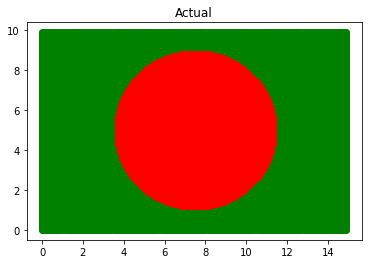

In [221]:
figure = 1

# plot a figure for the entire dataset
for color in df.color.unique():
    idx = df.color==color
    pl.scatter(df[idx].x, df[idx].y, color=color)
    pl.title('Actual')

Split in test and training sets

In [222]:
train_idx = df.x < 10

train = df[train_idx]
test = df[-train_idx]

print ("Training Set Size: %d" % len(train))
print ("Test Set Size: %d" % len(test))

# train using the x and y position coordiantes
cols = ["x", "y"]

Training Set Size: 10000
Test Set Size: 5000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


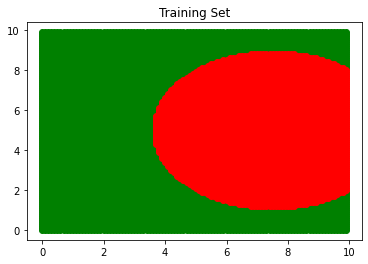

In [231]:
# plot a figure for the training dataset
for color in df.color.unique():
    idx = df.color==color
    pl.scatter(train[idx].x, train[idx].y, color=color)
    pl.title('Training Set')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


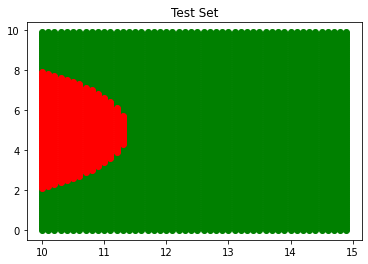

In [232]:
for color in df.color.unique():
    idx = df.color==color
    pl.scatter(test[idx].x, test[idx].y, color=color)
    pl.title('Test Set')

Train the Logicistic Regression Model

In [233]:
clf = linear_model.LogisticRegression()
clf_name = "Logistic Regression"

# train the classifier
clf.fit(train[cols], train.color_as_int)

# get the predicted values from the test set
test['predicted_color_as_int'] = clf.predict(test[cols])
test['pred_color'] = test.predicted_color_as_int.apply(lambda x: "red" if x==0 else "green")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':




Confusion Matrix for Logistic Regression:
[[   0 4408]
 [   0  592]]


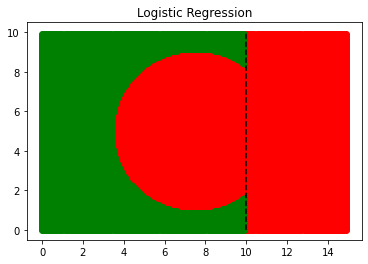

In [234]:
# plot each predicted color
for color in test.pred_color.unique():
  # plot only rows where pred_color is equal to color
  idx = test.pred_color==color
  pl.scatter(test[idx].x, test[idx].y, color=color)

# plot the training set as well
for color in train.color.unique():
  idx = train.color==color
  pl.scatter(train[idx].x, train[idx].y, color=color)

# add a dotted line to show the boundary between the training and test set
# (everything to the right of the line is in the test set)
#this plots a vertical line
train_line_y = np.linspace(y_min, y_max) #evenly spaced array from 0 to 10
train_line_x = np.repeat(10, len(train_line_y)) #repeat 10 (threshold for traininset) n times
# add a black, dotted line to the subplot
pl.plot(train_line_x, train_line_y, 'k--', color="black")

pl.title(clf_name)
print("\n")
print ("Confusion Matrix for %s:" % clf_name)
print (confusion_matrix(test.color, test.pred_color))
pl.show()

Train the Decision Tree Classifier

In [235]:
clf = tree.DecisionTreeClassifier()
clf_name = "Decision Tree"


# train the classifier
clf.fit(train[cols], train.color_as_int)

# get the predicted values from the test set
test['predicted_color_as_int'] = clf.predict(test[cols])
test['pred_color'] = test.predicted_color_as_int.apply(lambda x: "red" if x==0 else "green")



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.




Confusion Matrix for Decision Tree:
[[1950 2458]
 [   0  592]]


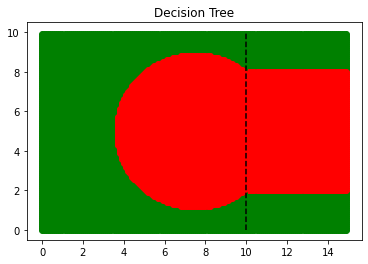

In [236]:
# plot each predicted color
for color in test.pred_color.unique():
  # plot only rows where pred_color is equal to color
  idx = test.pred_color==color
  pl.scatter(test[idx].x, test[idx].y, color=color)

# plot the training set as well
for color in train.color.unique():
  idx = train.color==color
  pl.scatter(train[idx].x, train[idx].y, color=color)

# add a dotted line to show the boundary between the training and test set
# (everything to the right of the line is in the test set)
#this plots a vertical line
train_line_y = np.linspace(y_min, y_max) #evenly spaced array from 0 to 10
train_line_x = np.repeat(10, len(train_line_y)) #repeat 10 (threshold for traininset) n times
# add a black, dotted line to the subplot
pl.plot(train_line_x, train_line_y, 'k--', color="black")

pl.title(clf_name)
print("\n")
print ("Confusion Matrix for %s:" % clf_name)
print (confusion_matrix(test.color, test.pred_color))
pl.show()

Train the SVM Model

In [237]:
clf = svm.SVC(degree=0.5)
clf_name = "SVM"


# train the classifier
clf.fit(train[cols], train.color_as_int)

# get the predicted values from the test set
test['predicted_color_as_int'] = clf.predict(test[cols])
test['pred_color'] = test.predicted_color_as_int.apply(lambda x: "red" if x==0 else "green")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.




Confusion Matrix for SVM:
[[4189  219]
 [   0  592]]


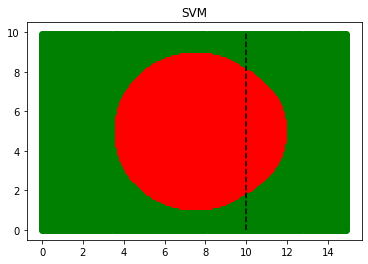

In [238]:
# plot each predicted color
for color in test.pred_color.unique():
  # plot only rows where pred_color is equal to color
  idx = test.pred_color==color
  pl.scatter(test[idx].x, test[idx].y, color=color)

# plot the training set as well
for color in train.color.unique():
  idx = train.color==color
  pl.scatter(train[idx].x, train[idx].y, color=color)

# add a dotted line to show the boundary between the training and test set
# (everything to the right of the line is in the test set)
#this plots a vertical line
train_line_y = np.linspace(y_min, y_max) #evenly spaced array from 0 to 10
train_line_x = np.repeat(10, len(train_line_y)) #repeat 10 (threshold for traininset) n times
# add a black, dotted line to the subplot
pl.plot(train_line_x, train_line_y, 'k--', color="black")

pl.title(clf_name)
print("\n")
print ("Confusion Matrix for %s:" % clf_name)
print (confusion_matrix(test.color, test.pred_color))
pl.show()